## Visual Search using SDK Python and a Specific Endpoint

This notebook is inspired by the tutorial [Visual Search SDK Python Quickstart](https://docs.microsoft.com/en-us/azure/cognitive-services/bing-visual-search/visual-search-sdk-python).

** Imports **

In [1]:
import http.client, urllib.parse
import json
from azure.cognitiveservices.search.visualsearch import VisualSearchAPI
from azure.cognitiveservices.search.visualsearch.models import (
    VisualSearchRequest,
    CropArea,
    ImageInfo,
    Filters,
    KnowledgeRequest,
)
from msrest.authentication import CognitiveServicesCredentials

** Reading a valid subscription key **

In [2]:
subscription_key = 'ec53a1b526de4d33817227fb42045046'

** Defining input image **

In [5]:
image_path = 'C:\\Git\\VisualSearch\\data\\blusa.png'
#'C:\\Geisa\\OpenHacks\\MLOpenHack\\gear_images\\insulated_jackets\\103454.jpeg'

Redereing input image:

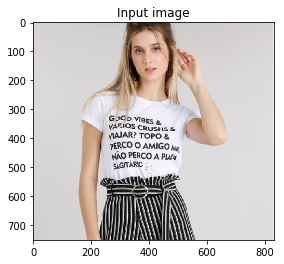

In [6]:
import utils as ut

%matplotlib inline
ut.rendering_input_image(image_path)

**Searching for similar images and printing results. **

In [7]:
def search( image_path, subscription_key, knowledge_request ):
    
    thumbnail_url_and_host_page_url = []

    # Instantiate the client
    client = VisualSearchAPI( CognitiveServicesCredentials(subscription_key) )
       
    # Using the client to search images and parse results
    with open(image_path, "rb") as image_fd:

        # You need to pass the serialized form of the model
        knowledge_request = json.dumps( knowledge_request.serialize() )

        print("\r\nSearch visual search request with binary of input image")
        result = client.images.visual_search( image = image_fd, knowledge_request = knowledge_request )

        if not result:
            print("No visual search result data.")
            return

        # Visual Search results
        if result.image.image_insights_token:
            print("Uploaded image insights token: {}".format( result.image.image_insights_token ) )
        else:
            print("Couldn't find image insights token!")

        if result.tags:
            all_urls = result.tags[0].actions[2].data.value
            print( len(all_urls) )
            thumbnail_url_and_host_page_url = [(url.thumbnail_url, url.host_page_url) for url in all_urls]

    return  thumbnail_url_and_host_page_url

In [8]:
def search_url_with_filter( image_path, subscription_key, site = "www.bing.com" ):

    filters = Filters( site = site )

    knowledge_request = VisualSearchRequest(
        knowledge_request = KnowledgeRequest( filters = filters )
    )
    return search( image_path, subscription_key, knowledge_request )

In [9]:
site = 'https://www.cea.com.br'
#'https://dtlcna20180921074030.azurewebsites.net/api/values'
#'https://cnaimages.azureedge.net/imagescontainer/'

results = search_url_with_filter( image_path, subscription_key, site = site )


Search visual search request with binary of input image


Discriminator _type is absent or null, use base class ImageAction.
Discriminator _type is absent or null, use base class ImageAction.
Subtype value ImageKnowledge/TextRecognitionAction has no mapping, use base class ImageAction.


Uploaded image insights token: bcid_G6efb17265d6b4d1ca718773adc259eb3*ccid_+GkjsvDI*thid_R.G6efb17265d6b4d1ca718773adc259eb3
30


In [10]:
results

[('https://tse2.mm.bing.net/th?id=OIP.OVnCZjJnKePOs2LfIVtzEQAAAA&pid=Api',
  'http://www.cea.com.br/moda-feminina/listrado'),
 ('https://tse2.mm.bing.net/th?id=OIP.u5TN92oeCtUw01OBeN0h5wAAAA&pid=Api',
  'http://www.cea.com.br/moda-feminina/blusas'),
 ('https://tse3.mm.bing.net/th?id=OIP.piAsikMlxl2h7EWgWRRfBAAAAA&pid=Api',
  'http://www.cea.com.br/moda-feminina/blusas'),
 ('https://tse1.mm.bing.net/th?id=OIP.TxQDoQ_mHgwfMbMrZaDvSwAAAA&pid=Api',
  'https://www.cea.com.br/cropped'),
 ('https://tse1.mm.bing.net/th?id=OIP.PIRAf6F7Xy5Aet7_Ig1yTwAAAA&pid=Api',
  'https://www.cea.com.br/moda-feminina/moda-praia'),
 ('https://tse2.mm.bing.net/th?id=OIP.IU-ag3JPmrUaVZ0l_kOmegAAAA&pid=Api',
  'https://www.cea.com.br/moda-feminina/moda-praia'),
 ('https://tse4.mm.bing.net/th?id=OIP.0p8w5L2fOp9p_bK-yrbtNQAAAA&pid=Api',
  'https://www.cea.com.br/cropped'),
 ('https://tse4.mm.bing.net/th?id=OIP.yTenYlOxACFCxte5E39gQAAAAA&pid=Api',
  'http://www.cea.com.br/moda-feminina/blusas'),
 ('https://tse2.mm.b

Redering results.

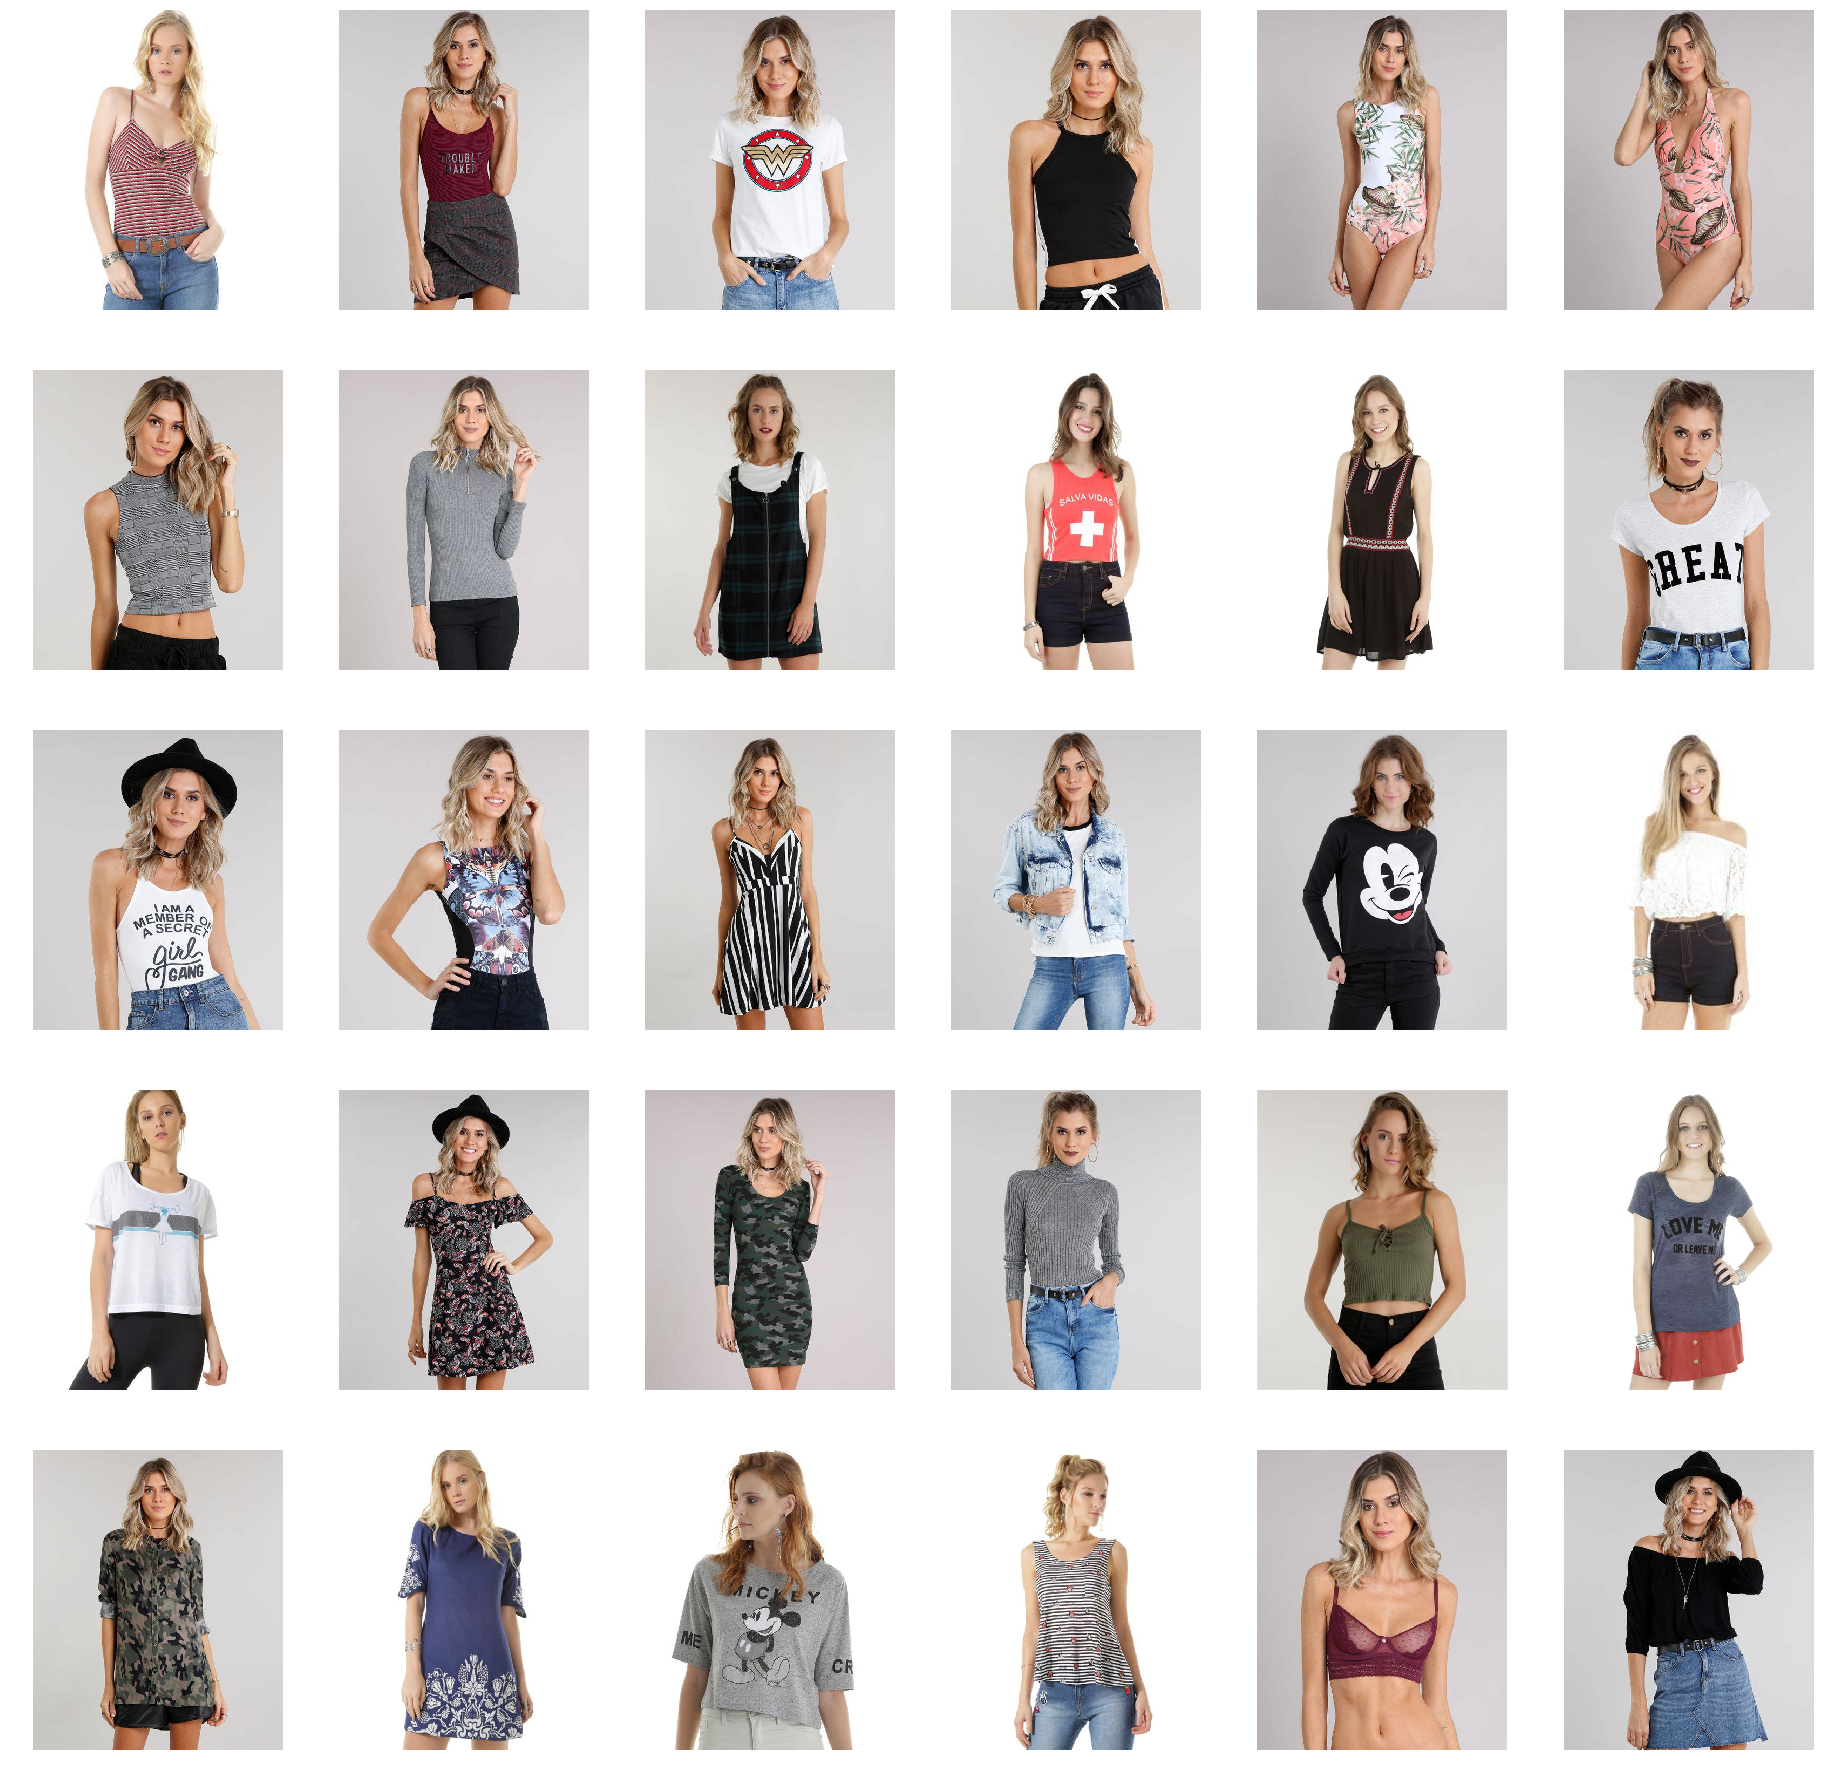

In [11]:
m = 5
n = len(results)//m
ut.rendering_images_grid(m, n, results)

**References**
* [Bing Visual Search SDK](https://docs.microsoft.com/en-us/azure/cognitive-services/bing-visual-search/sdk)
* [Images - Visual Search](https://docs.microsoft.com/en-us/rest/api/cognitiveservices/bingvisualsearch/images/visualsearch#imageobject)